In [1]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *


In [2]:
q=read_csv("techmental survey.csv")
q.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [3]:
q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
q=q.sort_values(["Age"])

In [5]:
q=q.drop(["Timestamp", "state", "phys_health_consequence", "supervisor", "phys_health_interview", "mental_health_interview", "mental_vs_physical", "obs_consequence", "comments"], axis=1)
q=q.dropna()

In [6]:
#removing negative and null values:

def ager(a):
    if a<0 or a>100:
        return 0
    elif isnull(a):
        return 0
    else:
        return a

In [7]:
q["Age"]=q["Age"].apply(ager)
q=q[q["Age"] != 0]

In [8]:
#removing unwanted  and mispelled values:

def genwut(a):
    if a in ["male", "Male", "something kinda male?", "M", "m", "Male ", "ostensibly male, unsure what that really means", "Man", "Male-ish", "Make", "Mail", "Mal", "maile", "male leaning androgynous" "Malr", "Guy (-ish) ^_^", "msle"]:
        return "male"
    elif a in ["Female", "female", "F", "f", "Woman", "femail", "Femake", "Female ", "Malr", "woman"]:
        return "female"
    elif a in ["Trans woman", "Trans-female", "Female (trans)"]:
        return "transgender"
    elif a in ["Cis Man", "Cis Male", "cis male", "Male (CIS)", "Cis Female", "cis-female/femme", "Female (cis)"]:
        return "cisgender"
    else:
        return "other"

In [9]:
q["Gender"]=q["Gender"].apply(genwut)
q.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,coworkers
989,8,other,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes
1090,11,male,United States,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,Some of them
118,18,male,United States,No,No,Yes,Rarely,1-5,Yes,Yes,No,No,No,No,Yes,Very easy,No,Some of them
287,18,male,United States,No,No,No,Never,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Very easy,No,Some of them
43,18,male,Netherlands,No,No,No,Often,6-25,No,Yes,No,Not sure,No,No,Don't know,Somewhat difficult,Yes,No


In [10]:
q.to_csv("tech_mental (new).csv", index=False)
q=read_csv("tech_mental (new).csv")

In [11]:
q.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
coworkers                    0
dtype: int64

Text(0.5, 1.0, 'Bar Plot')

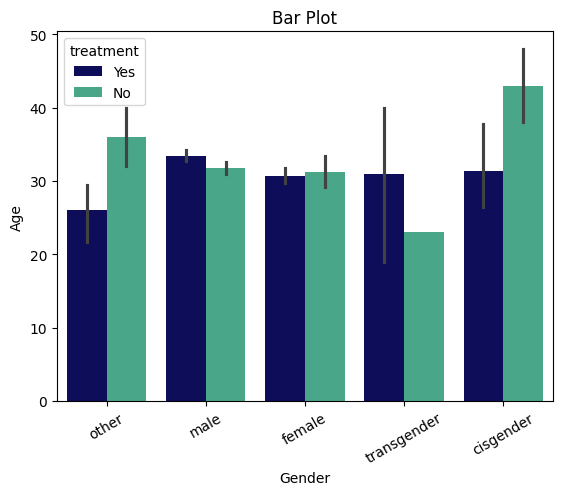

In [37]:
c_palette=["#020066","#39B58F"]
barplot(x="Gender", y="Age", hue="treatment", data=q, palette=c_palette)
xticks(rotation=30)
q["Gender"].unique().tolist()
title("Bar Plot")

Text(0.5, 1.0, 'Count Plot')

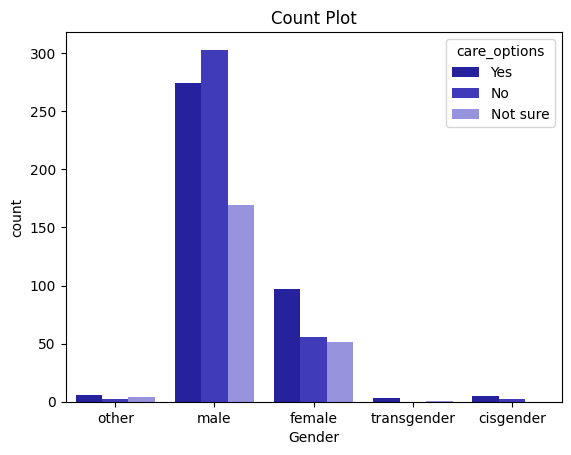

In [38]:
c_palette=["#130DB0","#2C26CE","#8C88E9"]
countplot(x='Gender', data=q, hue='care_options', palette=c_palette)
title("Count Plot")

Text(0.5, 1.0, 'Count Plot')

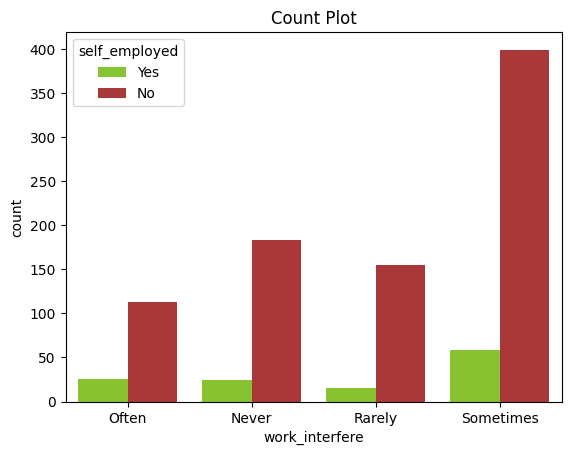

In [39]:
c_palette=["#8BDB19","#BE2526"]
countplot(x='work_interfere', data=q, hue='self_employed', palette=c_palette)
title("Count Plot")

Text(0.5, 1.0, 'Line Plot')

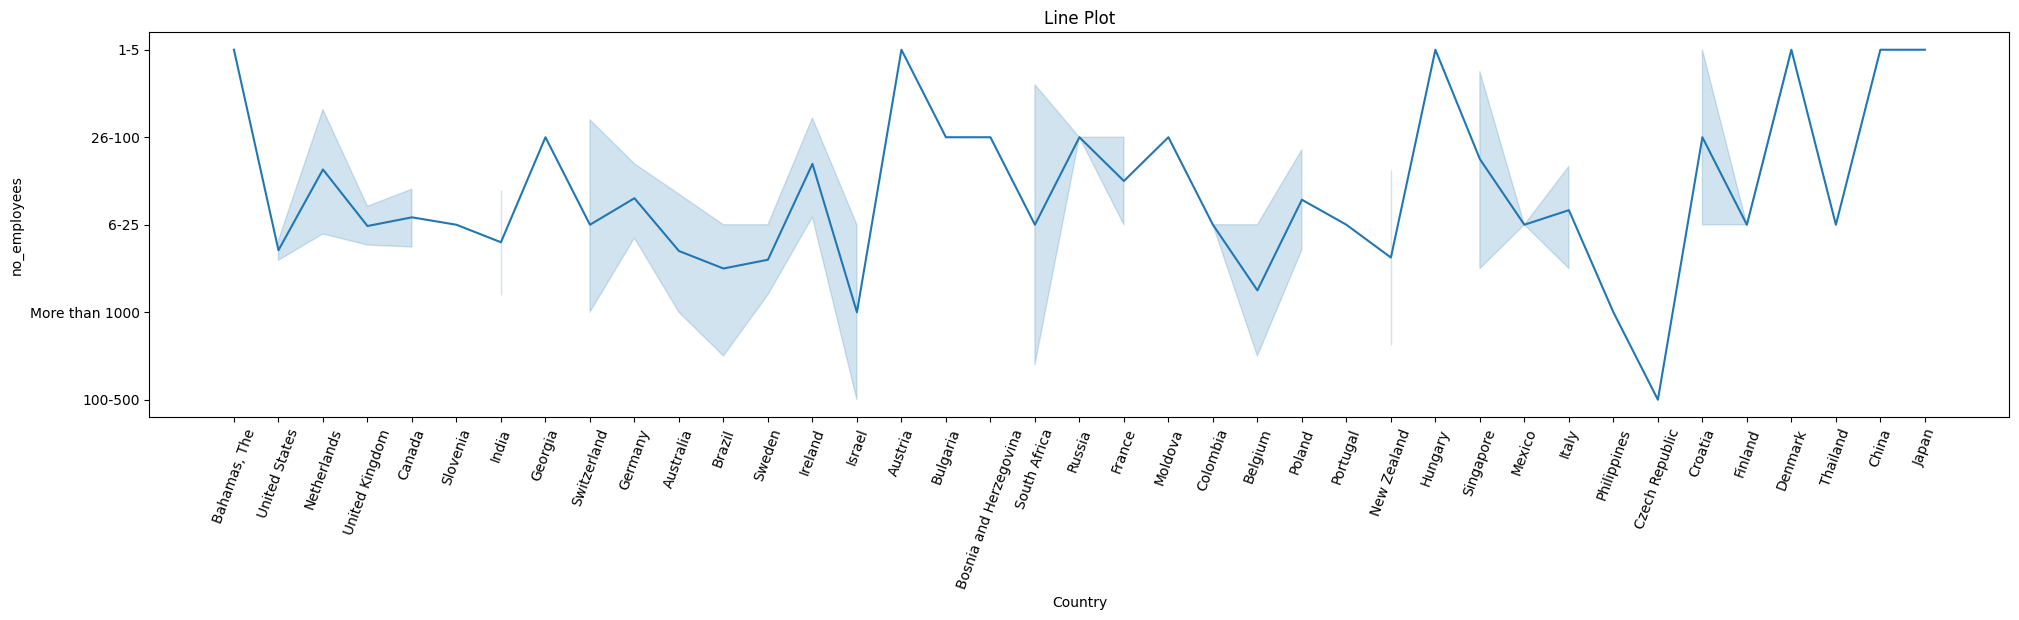

In [15]:
figure(figsize=(24,5))
lineplot(x="Country", y="no_employees", data=q)
xticks(rotation=70)
title("Line Plot")

Text(0.5, 1.0, 'Kdeplot')

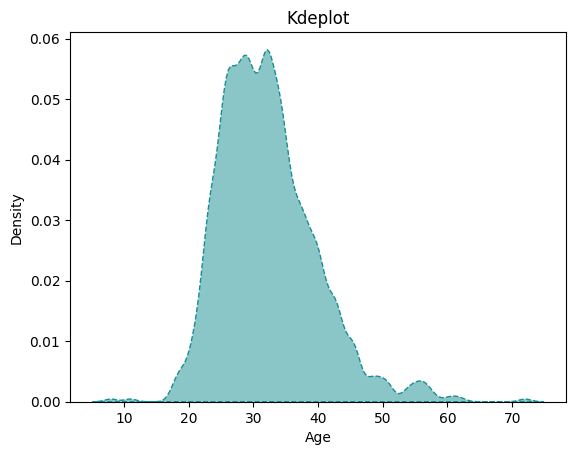

In [25]:
kdeplot(data=q, x='Age', bw_adjust=0.5, fill=True, color='#178E92', linestyle='--', alpha=0.5)
title("Kdeplot")

Text(0.5, 1.0, 'Displot')

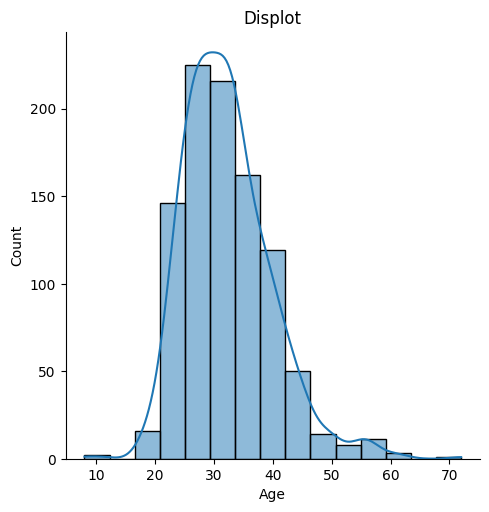

In [17]:
displot(q['Age'], kde=True, bins=15)
title("Displot")

Text(0.5, 1.0, 'Scatter Plot')

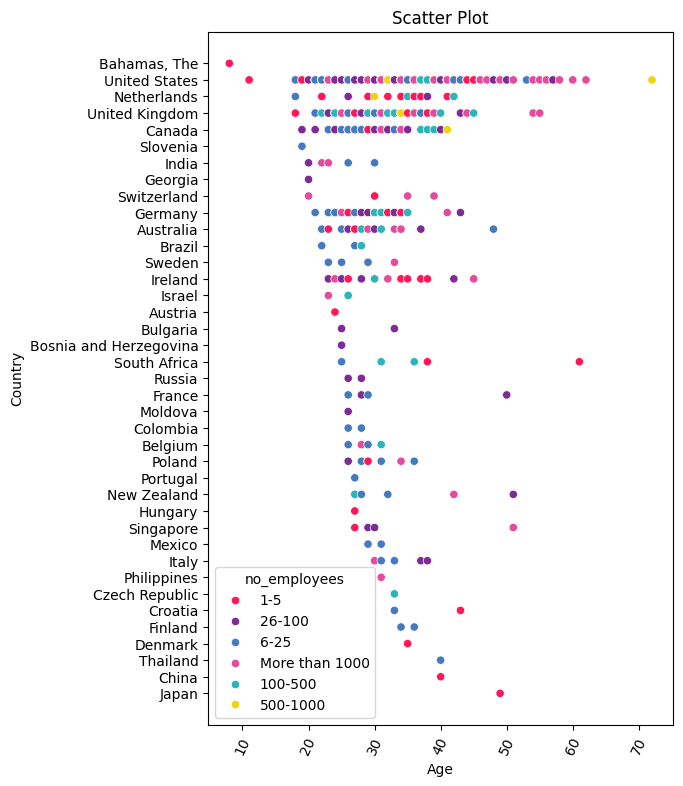

In [40]:
c_palette=["#FF1759","#7D2C94","#457BBE","#E44C9B","#2CB4B9","#F1D311"]
figure(figsize=(6,9))
scatterplot(x="Age", y="Country", hue="no_employees", palette=c_palette, data=q)
xticks(rotation=65)
title("Scatter Plot")